## Python statistics essential training - 03_02_distributions

In [2]:
#meta 4/7/2020
#Ch3. Visualizing and Describing Data
#my code and solution code bits

In [3]:
import numpy as np
import scipy.stats
import pandas as pd

In [41]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [5]:
import re
import mailbox
import csv

# Describe Distributions
The job of statistics is to describe variation.  We look at ways to describe and visualize the variation in a single, quantitative variable, namely the distribution of the variable.

# Gapminder
Identifying and explaining global trends in data with the late statistician and public health expert Hans Rosling.

- book Factfulness  
- website gapminder.org

## 0. Load Data
A few data sets that describe the distribution of incomes per person, and per day, in China, and in the U.S., respectively, in 1965, and 2015 ( given in 2011 equivalent dollars).

Src: generated these data sets using a few simple numbers about the Chinese and American economies from Gapminder.org Thus, they should be understood to be qualitative, and not accurate representations of the truth.

Each entry represents  
- avg income of a variable number of people, depending on the size of the country's population in that year
- pre-generated a column containing the base 10 logarithm of the income.

That's because Hans Rosling argues, and I agree, that the actual difference that money makes in one's quality of life, goes roughly logarithmically with daily income. For instance, if you have 16 dollars a day, you have to go up to 64, rather than 18, before things really change for you.


In [7]:
china1965 = pd.read_csv('lynda_data/income-1965-china.csv')
china2015 = pd.read_csv('lynda_data/income-2015-china.csv')
usa1965 = pd.read_csv('lynda_data/income-1965-usa.csv')
usa2015 = pd.read_csv('lynda_data/income-2015-usa.csv')

china1965.info()

In [9]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cc7d4a8>,
      dtype=object)

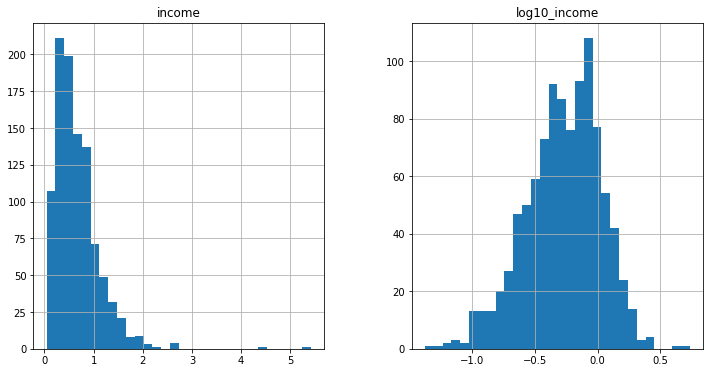

In [49]:
china1965.hist(bins=30, figsize=(12, 6))

In [50]:
#my log10
print(np.log10([0.01,0.1,1,10,100,1000,10000]))
print(np.log10([0.25,0.5,1,2,4,8,16,32,64,128]))

[-2. -1.  0.  1.  2.  3.  4.]
[-0.60205999 -0.30103     0.          0.30103     0.60205999  0.90308999
  1.20411998  1.50514998  1.80617997  2.10720997]


## 1. Describe the variation 

In [10]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


### 1.1 By quantifying its range
range of extremes, look at the minimum and maximum of income.  
However, focusing on the extremes is not very insightful. It is also imprecise if our data set is a limited sample of a population, rather than a complete census.

### 1.2 Mean, Variance
The variance is a measure of variation tied closely to the mathematical concept of normal distribution.


In [13]:
print(china1965.var())
#the argument ddof=0 is related to slightly different normalizations of the variance.
china1965.var(ddof=0)

income          0.209056
log10_income    0.088698
dtype: float64


income          0.208846
log10_income    0.088610
dtype: float64

### 1.3 Quantile
The quantile is a statistics that describe a value for which a certain percentage of the data points lie below it. 


In [20]:
print(china1965.quantile([0.25,0.75]))


        income  log10_income
0.25  0.344130     -0.463277
0.75  0.863695     -0.063640


In [21]:
print(china1965.quantile(0.5))
china1965.median()

income          0.557477
log10_income   -0.253773
Name: 0.5, dtype: float64


income          0.557477
log10_income   -0.253773
dtype: float64

We find that 25% of the China 1965 income data points are smaller than 34 cents, and 75% are smaller than 86 cents, or equivalently, 25% are larger than 86 cents.

Taken together, the 25% and 75% quantiles specify a coverage interval that includes 50% of the data points. The 50% quantile is a good choice for a typical value of a distribution, since half the samples lie below, and half lie above it. It is also known and computed as median. 

### 1.4 Percentage of Population for a Given Value
The inverse of the quantile operation consists in finding the percentage of the population at which a given value lies.

To find it, we use scipy.stats. The function is called percentile of score. 


In [39]:
scipy.stats.percentileofscore(china1965.income,1.5)

95.5

In this case, we find that 95% of incomes in 1965, lie below 1.5 dollars. 


## Compare China and the United States in 1965
We see that, on most counts, U.S. incomes were about a factor of 50 larger.

In [23]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [24]:
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c9259b0>,
      dtype=object)

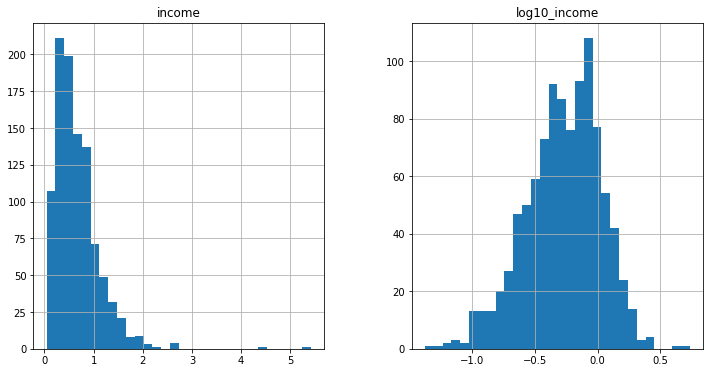

In [47]:
china1965.hist(bins=30, figsize=(12, 6))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ca05860>,
      dtype=object)

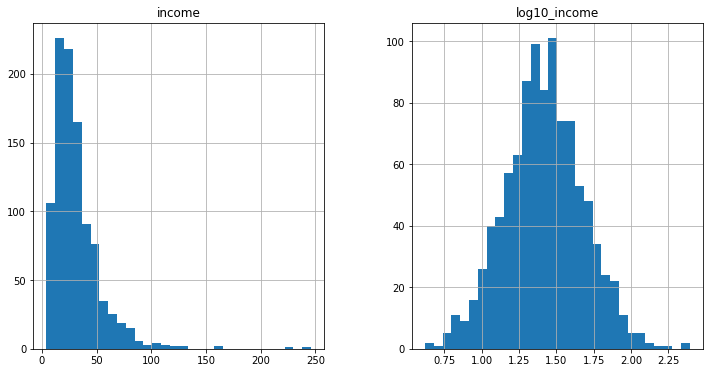

In [48]:
usa1965.hist(bins=30, figsize=(12, 6))